In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os

%matplotlib inline

# Séries Periódicas

O Gráfico abaixo mostra um exemplo de série periódica amostrada com frequência de amostragem de 30 Hz, ou periodo de amostragem de 0,03333 segundos. Essa função possui 3 componentes de frequência:
1.	Frequência de 0 rad/s, que representa o valor médio constante igual a 1;
2.	Frequência de 2𝜋 rad/s, ou 1 Hz;
3.	Frequência de 6𝜋 rad/s, ou 3 Hz.


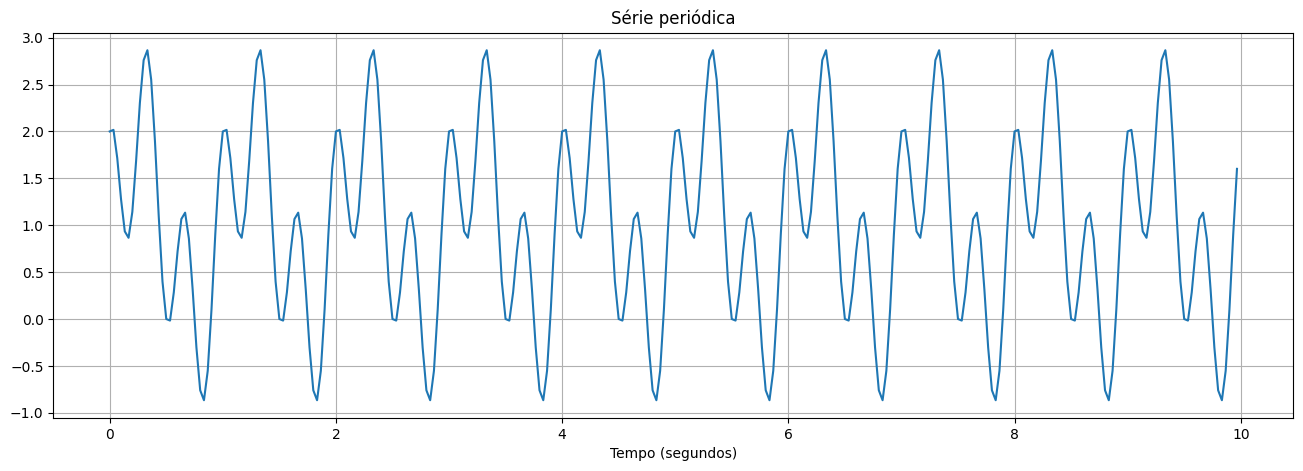

In [ ]:
import math

# Frequência de amostragem
fa = 30

# Periodo de amostragem
Ta = 1/fa

# Vetor de tempo discreto
t = np.arange(0.0, 10.0, Ta)
N = t.shape[0]

# Cria função periódica
pi = math.pi
f = 1.0 + np.sin(2*pi*t) + np.cos(6*pi*t)

plt.figure(figsize=(16, 5))
plt.plot(t, f)
plt.title('Série periódica')
plt.xlabel('Tempo (segundos)')
plt.grid(True)
plt.show()

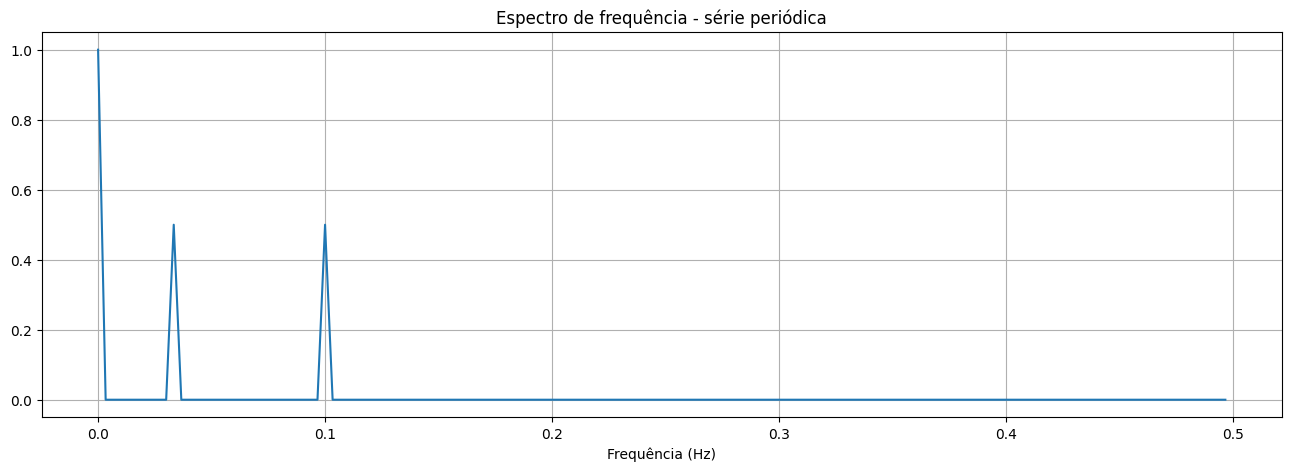

In [28]:
# Transformada Fourier
F=np.fft.fft(f)/N

# Vetor de frequências
w=np.arange(0,N)*fa/N
plt.figure(figsize=(16,5))
plt.plot(w[:int(N/2)],np.abs(F[:int(N/2)]))
plt.title('Espectro de frequência - série periódica')
plt.xlabel('Frequência (Hz)')
#plt.xticks([0,1,3,fa/2],labels=['0 Hz','1 Hz','3 Hz','15 Hz'])
plt.grid(True)
plt.show()

# Séries de Temperaturas

Como exemplo real de uma série temporal vamos vizualizar o conjunto de dados "The weather dataset" (https://www.bgc-jena.mpg.de/wetter/ (https://www.bgc- jena.mpg.de/wetter/)), criado pelo Max Planck Institute for Biogeochemistry.

Esse conjunto de dados contém 14 características, tais como temperatura do ar, pressão atmosférica e humidade. Os dados são coletados a cada 10 minutos, iniciando em 2003. Por conveniência são usados somente os dados coletados entre 2009 e 2016, que foram preparados por François Chollet para seu livro "Deep Learning with Python".

Os dados estão em um arquivo tipo CSV, então vamos carregá-lo em um dataframe pandas.


In [5]:
df = pd.read_csv('jena_climate_2009_2016.csv')
print('Dimensao dos dados:', df.shape)
df.head()

Dimensao dos dados: (420551, 15)


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


A série é muito longa, pois originalmente os dados são amostrados a cada 10 minutos. Porém, como somente estamos apresentando exemplos de séries,utilizaremos os dados amostrados a cada hora, portanto, devemos realizar uma subamostragem dos dados de intervalos de 10 minutos para 1 hora. Além disso,vamos separar a coluna de data-hora.

In [6]:
# Pega 1 dado a cada 6 (10 minutos original, para 1 hora)
df = df[5::6]

# Separa coluna da data-hora
date_time =pd.to_datetime(df.pop('Date Time'),format='%d.%m.%Y %H:%M:%S')

Gráficos da temperatura em função do tempo.


Série completa da temperatura


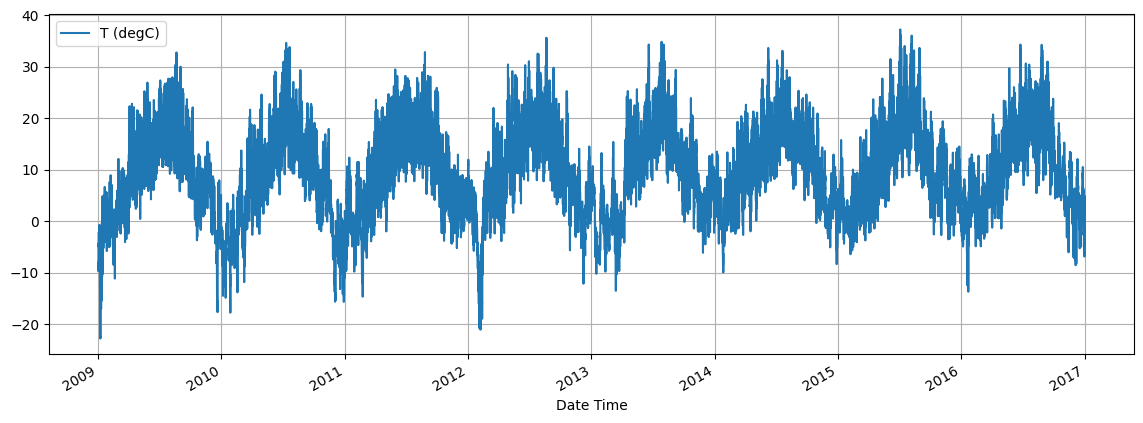

In [7]:
print('\nSérie completa da temperatura')
plot_cols=['T (degC)']
plot_features=df[plot_cols]
plot_features.index=date_time
plot_features.plot(subplots=True,figsize=(14,5))
plt.grid(True)

Desse gráfico é possível observar a sazonalidade anual da série e a presença de ruído.


Temperatura em 20 dias de janeiro de 2009


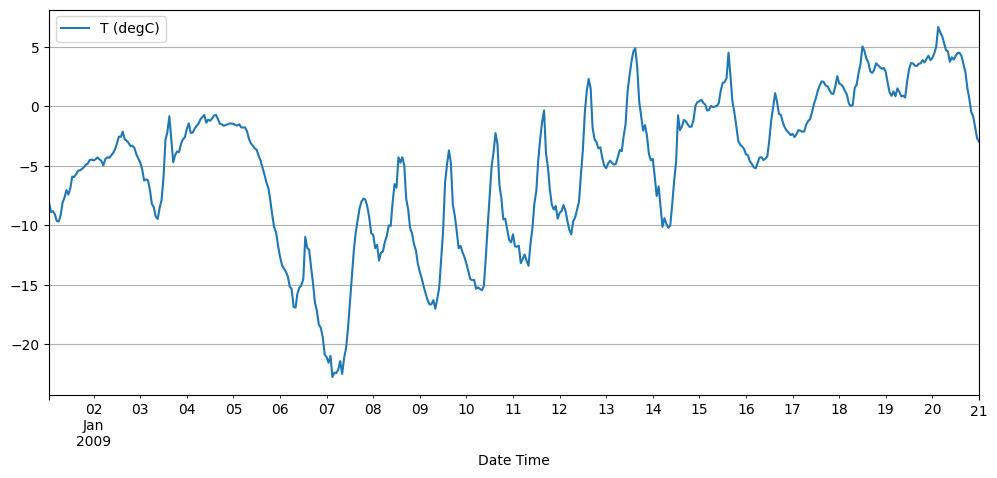

In [23]:
print('\nTemperatura em 20 dias de janeiro de 2009')
plot_features=df[plot_cols][:480]
plot_features.index=date_time[:480]
plot_features.plot(subplots=True,figsize=(12,5))
plt.grid(True)

Desse gráfico pode-se observar alguns ciclos que ocorrem durante os dias.
Nesse gráfico pode-se também observar a tendência de elevação da temperatura entre os dias 7 e 20 de janeiro de 2009.


Temperatura em 2 dias consecutivos


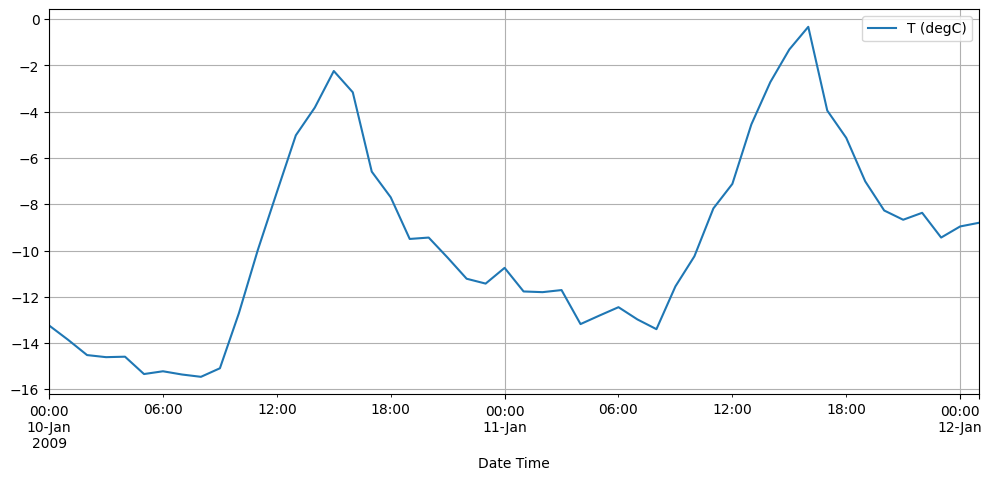

In [9]:
print('\nTemperatura em 2 dias consecutivos')
plot_features=df[plot_cols][215:265]
plot_features.index=date_time[215:265]
plot_features.plot(subplots=True,figsize=(12,5))
plt.grid(True)

Desse gráfico pode-se observar a sazonalidade diária da temperatura.

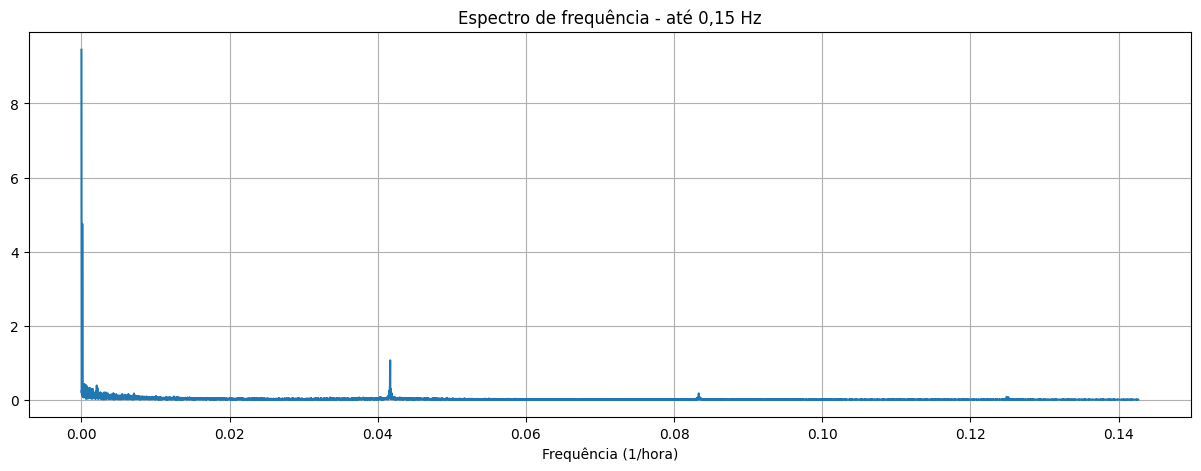

In [30]:
# Frequencia de amostragem
fa = 1 # 1/hora

# Periodo de amostragem
Ta = 1/fa # hora

# Dados
x = np.array(df['T (degC)'])

# Número de amostras
N = x.shape[0]

# Vetor de tempo discreto
t = np.arange(0.0, N, Ta)
N = t.shape[0]

# Transformada de Fourier
Fx = np.fft.fft(x)/N

# Vetor de frequências
w = np.arange(0, N)*fa/N

plt.figure(figsize=(15, 5))
plt.plot(w[:10000], abs(Fx[:10000]))
plt.title('Espectro de frequência - até 0,15 Hz')
plt.xlabel('Frequência (1/hora)')
#plt.xticks([1/24, 1/12], labels=['1/dia', '2/dia'])
plt.grid(True)
plt.show()

Observe os picos em 0 Hz e 0,04167 Hz:
*   O pico em frequência 0 Hz mostra que a média da temperatura não é igual a zero
*   O pico em 0,04167 representa o ciclo diário de temperatura (1/24 = 0,04167
  hora$^{−1}$)

Vamos observar o espectro de frequências no intervalo de 0 a 0,0015 hz, que é aproximadamente igual a 1/(24 ∗ 30) hora$^{−1}$, que representa um mês$^{−1}$


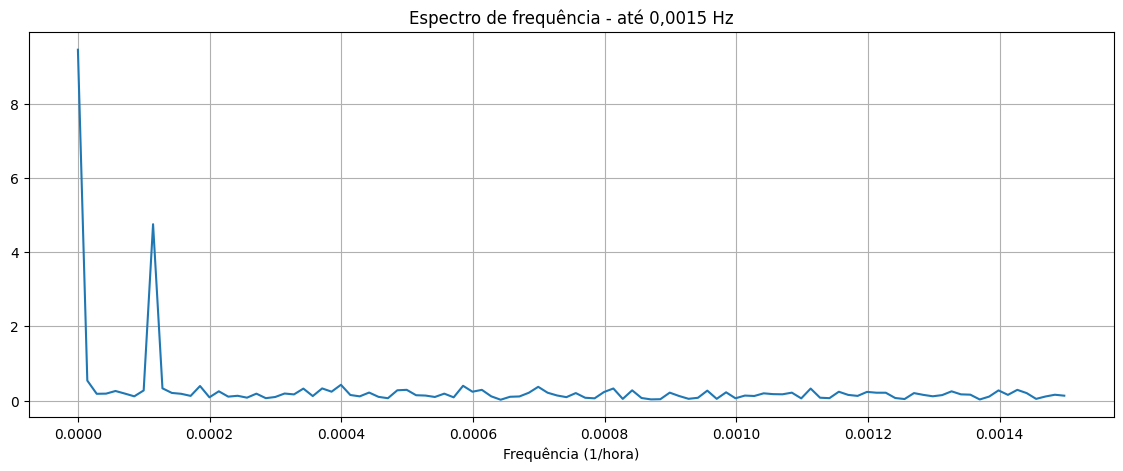

In [13]:
plt.figure(figsize=(14, 5))
plt.plot(w[:106], abs(Fx[:106]))
plt.title('Espectro de frequência - até 0,0015 Hz')
plt.xlabel('Frequência (1/hora)')
plt.grid(True)
plt.show()

Observe o pico em 0,000114167 Hz (horas$^{−1}$), que representa o ciclo de variação anual de temperatura.

Vamos agora observar a variação de temperatura durante o mês de janeiro de 2009.

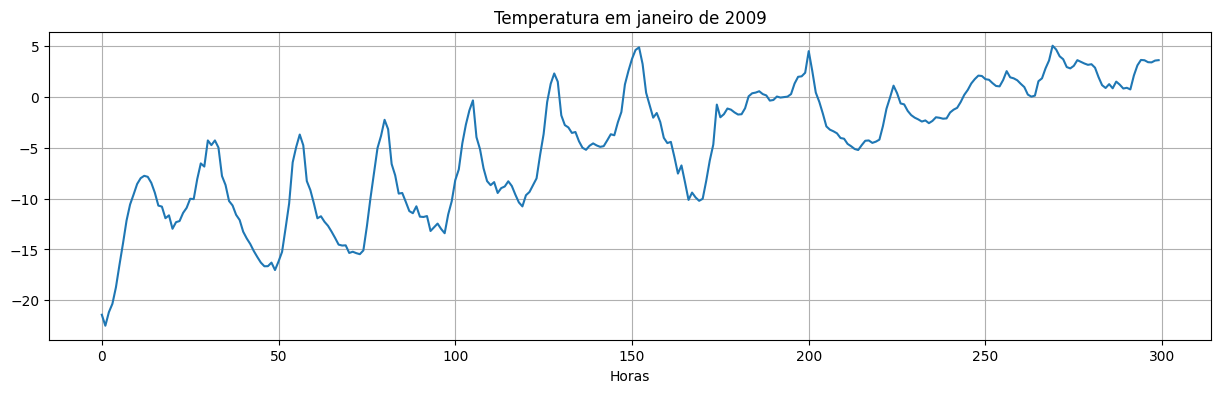

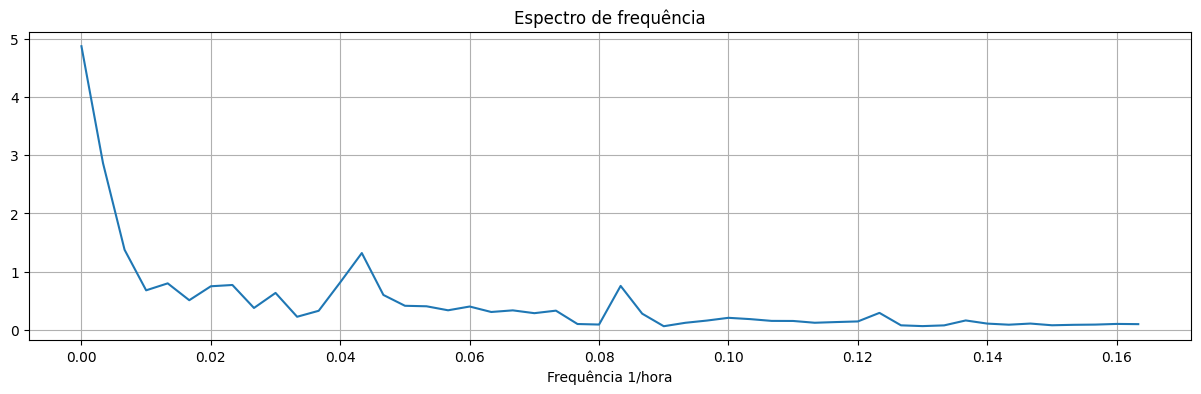

In [31]:
# Série crescente de temperatura
x = np.array(df['T (degC)'])
x = x[150:450]

# Numero de amostras
N = x.shape[0]

# Vetor de frequências
w = np.arange(0, N)*fa/N

# Transformada de Fourier
Fx = np.fft.fft(x)/N

plt.figure(figsize=(15, 4))
plt.plot(x)
plt.title('Temperatura em janeiro de 2009')
plt.xlabel('Horas')
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 4))
plt.title('Espectro de frequência')
plt.plot(w[:50], abs(Fx[:50]))
plt.xlabel('Frequência 1/hora')
#plt.xticks([0, 1/24, 1/12], labels=['0', '1/dia', '2/dia'])
plt.grid(True)
plt.show()

Observe que existem infinitas componentes de baixa frequência, que representa a **tendência** suave de crescimento da temperatura nesse intervalo

# Ruído Branco

Vamos calcular a Transformada de Fourier de um ruído branco e visualizar o seu conteúdo de frequências.

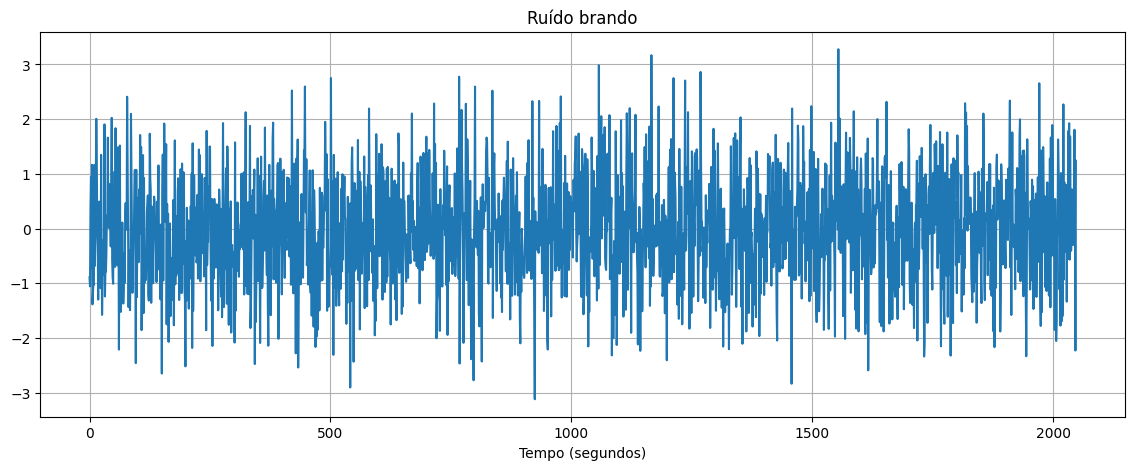

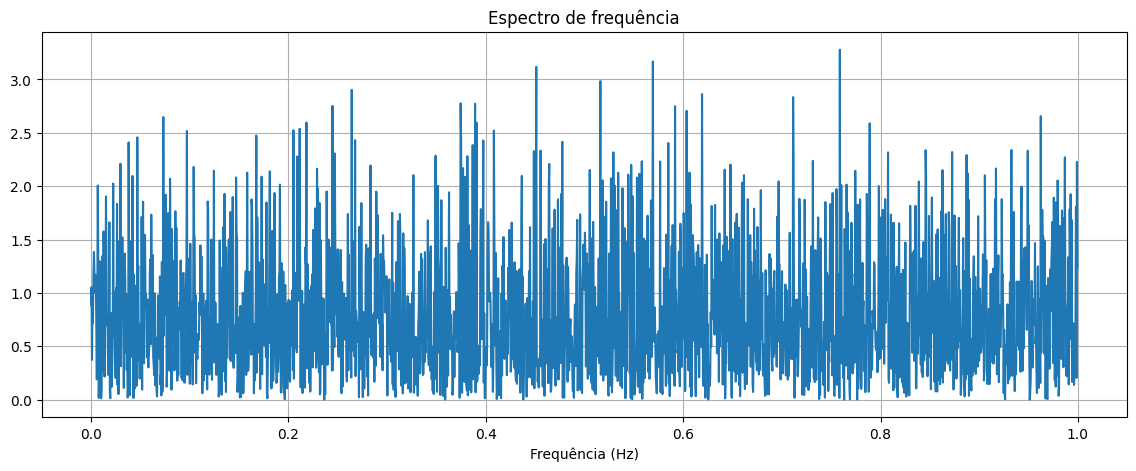

In [15]:
# Frequencia de amostragem
fa = 1 # segundo

# Periodo de amostragem
Ta = 1/fa # Hz

# Ruído branco
r = np.random.normal(loc=0.0, scale=1.0, size=(2048,1))

# Número de amostras
N = r.shape[0]

# Vetor de tempo discreto
t = np.arange(0.0, N, Ta)
N = t.shape[0]

# Transformada de Fourier
F = np.fft.fft(r)

# Vetor de frequências
w = np.arange(0, N)*fa/N

plt.figure(figsize=(14, 5))
plt.plot(r)
plt.title('Ruído brando')
plt.xlabel('Tempo (segundos)')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(w, abs(F))
plt.title('Espectro de frequência')
plt.xlabel('Frequência (Hz)')
plt.grid(True)
plt.show()

Observe que um ruído branco possui componentes de frequência para qualquer valor de frequência.

Teoricamente, a amplitude do conteúdo de frequências de um ruído branco é igual a 1 para qualquer frequência de 0 a infinito.

# Filtragem passa baixa com a Transformada Fourier Discreta

A Transformada de Fourier pode ser usada para filtrar um sinal de forma a eliminar flutuações bruscas e ruídos. Para isso basta zerar os coeficientes da Transformada Fourier Discreta a partir da frequência que se deseja eliminar.

Número total de amostras: 70091
Índices da frequência de corte: 7009 63082


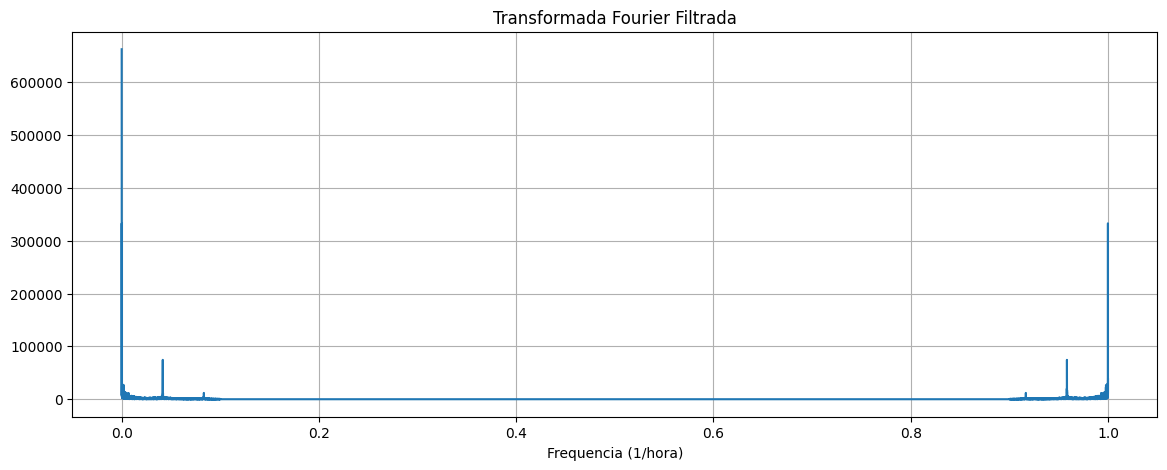

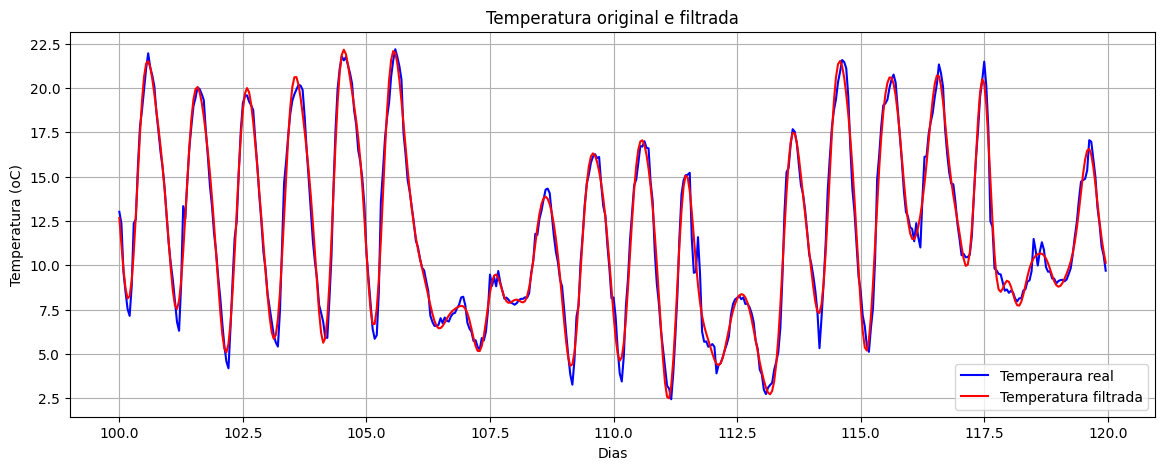

In [16]:
# Dados
x = np.array(df['T (degC)'])

# Número de amostras
N = x.shape[0]

# Vetor de tempo discreto
t = np.arange(0.0, N, Ta)/24
N = t.shape[0]

# Transformada de Fourier
Fx = np.fft.fft(x)

# Vetor de frequências
w = np.arange(0, N)*fa/N

# Índice da componente de frequência 0,1 hora$^{-1}$
dw = w[2] - w[1]
ind1 = np.max(np.where(w<0.1+dw/2))
ind2 = np.min(np.where(w>fa-0.1-dw/2))
print('Número total de amostras:', N)
print('Índices da frequência de corte:',ind1, ind2)

# Zera componentes de frequencias maior do que 0,1 hora$^{-1}$
Fx[ind1:ind2] = 0

# Calcula Transformada Fourier Inversa
xf = np.fft.ifft(Fx)

plt.figure(figsize=(14, 5))
plt.plot(w, np.abs(Fx))
plt.title('Transformada Fourier Filtrada')
plt.xlabel('Frequencia (1/hora)')
#plt.xticks([0, 1/24, 1/12], labels=['0', '1/dia', '2/dia'])
plt.grid()
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(t[2400:2880], x[2400:2880], 'b', label='Temperaura real')
plt.plot(t[2400:2880], np.abs(xf[2400:2880]), 'r', label='Temperatura filtrada')
plt.title('Temperatura original e filtrada')
plt.ylabel('Temperatura (oC)')
plt.xlabel('Dias')
plt.grid()
plt.legend()
plt.show()

Pode-se realizar esse mesmo processo de filtragem para os dados divididos em janelas. Dessa forma obtém-se uma latência menor entre o sinal real e o sinal filtrado.

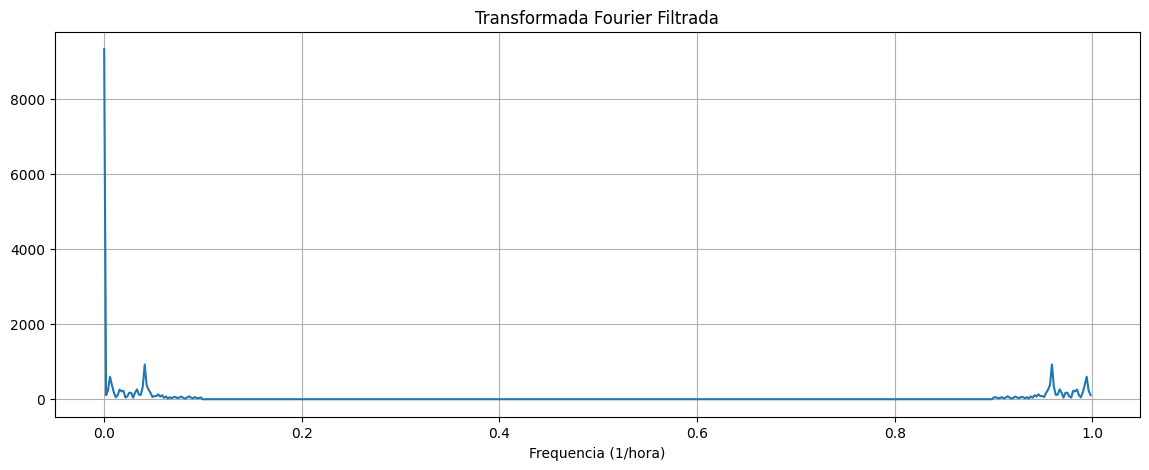

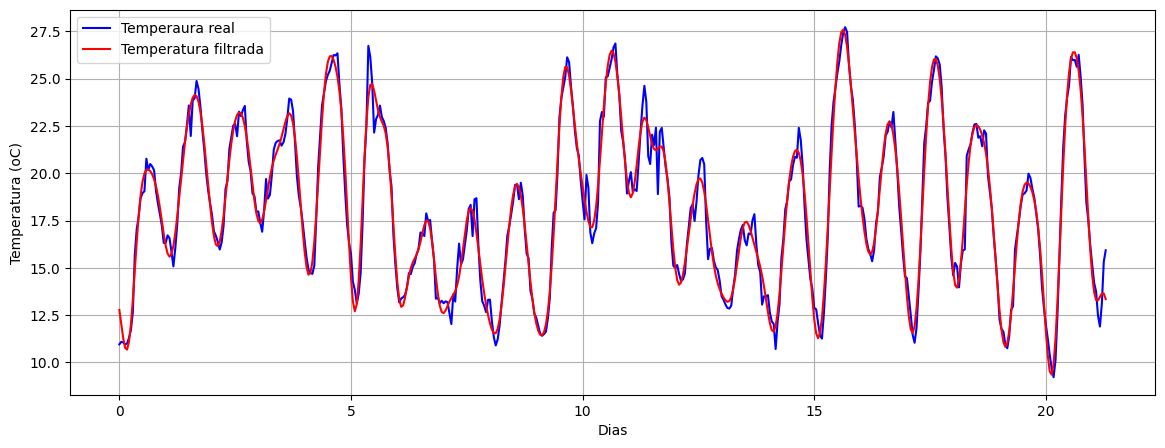

In [18]:
# Numero de amostras em cada janela
m = 512

# Vetores de frequências e tempo
w = np.arange(0,m)*fa/m
t = np.arange(0, m)/24

# Índice da componente de frequência 0,1 hora$^{-1}$
dw = w[2] - w[1]
ind1 = np.max(np.where(w<0.1+dw/2))
ind2 = np.min(np.where(w>fa-0.1-dw/2))

# Calcula TF e sinal filtrado para cada janela
for i in range(10):
    # Indices dos elementos na janela
    ini = i*m
    ifi = ini + m

    # Janela de dados
    xi = x[ini:ifi]

    # Aplica função de janela
    xw = xi

    # TF da janela
    Fi = np.fft.fft(xi)

    # Elimina componetes de alta frequencia
    Fi[ind1:ind2] = 0

    # Calcula TFI
    xfi = np.fft.ifft(Fi)

plt.figure(figsize=(14, 5))
plt.plot(w, np.abs(Fi))
plt.title('Transformada Fourier Filtrada')
plt.xlabel('Frequencia (1/hora)')
plt.grid()
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(t, xi, 'b', label='Temperaura real')
plt.plot(t, np.abs(xfi), 'r', label='Temperatura filtrada')
plt.ylabel('Temperatura (oC)')
plt.xlabel('Dias')
plt.grid()
plt.legend()
plt.show()



# Filtragem passa baixa com a Transformada Cosseno

A Transformada Cosseno também pode ser usada para filtrar um sinal de forma a eliminar flutuações bruscas e ruídos.

Para isso basta zerar os coeficientes da Transformada Cosseno a partir da frequência que se deseja eliminar.

Nesse exemplo, vamos eliminar da série de temperatura todas as frequência acima de 0,1 hora$^{-1}$. Observa-se que a
Transfromada Cosseno não é rebatida em múltiplos da frequência de amostragem como no caso da Tranformada Fourier.


Número total de amostras: 70091
Índice da frequência de corte: 7009


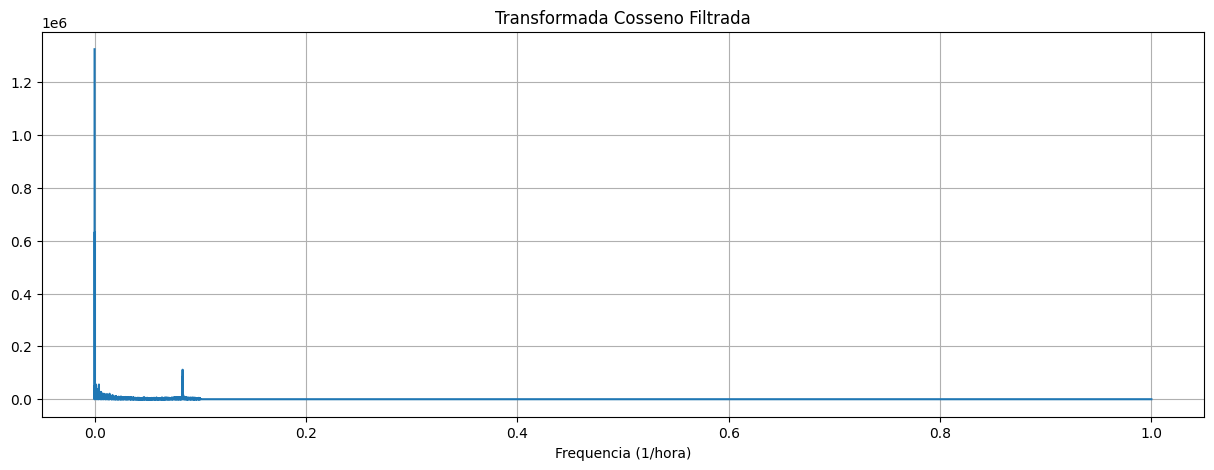

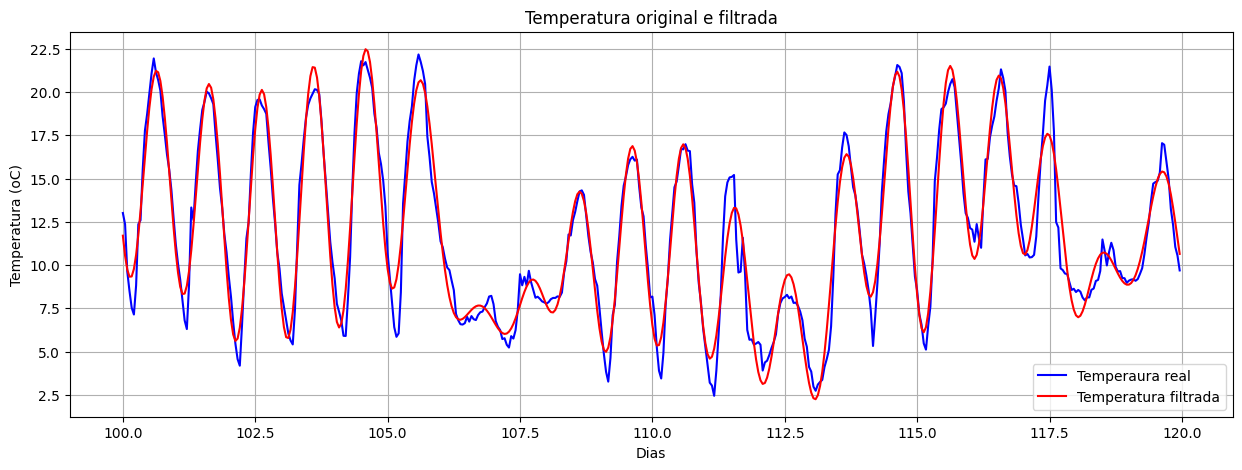

In [19]:
# Importa função para calcular TC
from scipy import fft

# Dados
x = np.array(df['T (degC)'])

# Número de amostras
N = x.shape[0]

# Vetor de tempo discreto
t = np.arange(0.0, N, Ta)/24
N = t.shape[0]

# Transformada de Fourier
Cn = fft.dct(x)

# Vetor de frequências
w = np.arange(0, N)*fa/N

# Índice da componente de frequência 0,1 hora$^{-1}$
dw = w[2] - w[1]
ind = np.max(np.where(w<0.1+dw/2))
print('Número total de amostras:', N)
print('Índice da frequência de corte:',ind)

# Zera componentes de frequencias maior do que 0,1 hora$^{-1}$
Cn[ind:] = 0

# Calcula Transformada Cosseno Inversa
xf = fft.idct(Cn)

plt.figure(figsize=(15, 5))
plt.plot(w, np.abs(Cn))
plt.title('Transformada Cosseno Filtrada')
plt.xlabel('Frequencia (1/hora)')
plt.grid()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(t[2400:2880], x[2400:2880], 'b', label='Temperaura real')
plt.plot(t[2400:2880], np.abs(xf[2400:2880]), 'r', label='Temperatura filtrada')
plt.title('Temperatura original e filtrada')
plt.ylabel('Temperatura (oC)')
plt.xlabel('Dias')
plt.grid()
plt.legend()
plt.show()


Pode-se realizar esse mesmo processo de filtragem para os dados divididos em janelas. Dessa forma obtém-se uma latência menor entre o sinal real e o sinal filtrado.

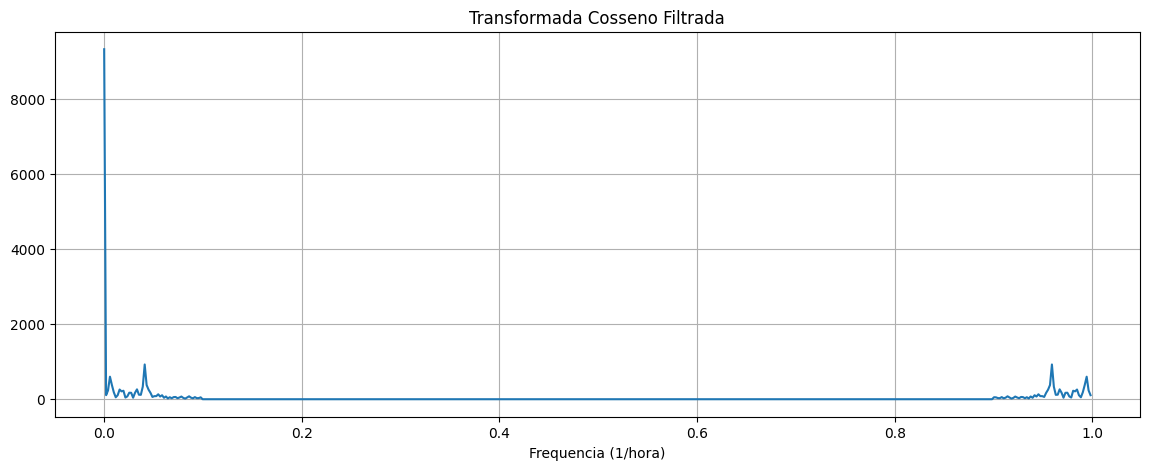

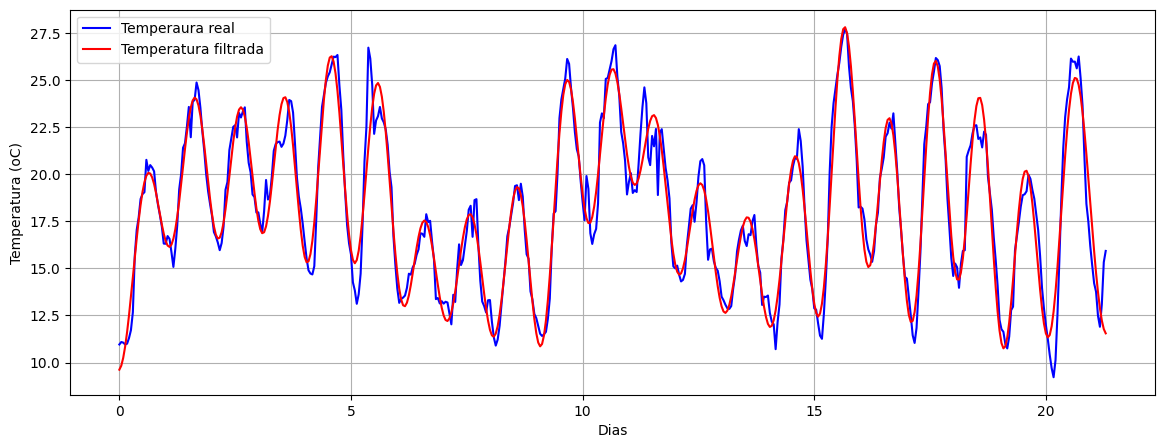

In [21]:
# Numero de amostras em cada janela
m = 512

# Vetores de frequências e tempo
w = np.arange(0,m)*fa/m
t = np.arange(0, m)/24

# Índice da componente de frequência 0,1 hora$^{-1}$
dw = w[2] - w[1]
ind = np.max(np.where(w<0.1+dw/2))

# Calcula TF e sinal filtrado para cada janela
for i in range(10):
    # Indices dos elementos na janela
    ini = i*m
    ifi = ini + m

    # Janela de dados
    xi = x[ini:ifi]

    # Aplica função de janela
    xw = xi

    # TF da janela
    Ci = fft.dct(xi)

    # Elimina componetes de alta frequencia
    Ci[ind:] = 0

    # Calcula TFI
    xfi = fft.idct(Ci)

plt.figure(figsize=(14, 5))
plt.plot(w, np.abs(Fi))
plt.title('Transformada Cosseno Filtrada')
plt.xlabel('Frequencia (1/hora)')
plt.grid()
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(t, xi, 'b', label='Temperaura real')
plt.plot(t, np.abs(xfi), 'r', label='Temperatura filtrada')
plt.ylabel('Temperatura (oC)')
plt.xlabel('Dias')
plt.grid()
plt.legend()
plt.show()